# Model

## Implementation

### Importing used libraries

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import math, copy


### Sigmoid function

$$
g(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}
$$

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### prediction function `f_wb`

$$
f_{\mathbf{w},b}(\mathbf{x^{(i)}}) = g(z^{(i)})\\
z^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)}+ b
$$

In [3]:
def f_wb(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

### Loss function

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

In [4]:
def loss(y, y_hat):
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

### The cost function is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] $$

In [5]:
def compute_cost_logistic(X, Y, w, b):
    m = X.shape[0] 
    cost = 0.0
    for i in range(m):
        cost += loss(Y[i], f_wb(X[i], w, b))
        
    return cost / m

### Computing Gradients `dj_dw, dj_b`

$$
\frac{\partial{J(\vec{w}, b)}}{\partial{w_j}} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{{\vec w}, b}(\vec{x}^{(i)}) - y^{(i)}) x^{(i)}_{j} \\ 
\frac{\partial{J(\vec{w}, b)}}{\partial{b}} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{{\vec w}, b}(\vec{x}^{(i)}) - y^{(i)})
$$

In [6]:
def compute_gradient_logistic(X, Y, w, b):
    """
    Compute the gradient for logistic regression using vectorization.
    
    Args:
        X: (m, n) matrix of input features
        Y: (m, ) vector of labels
        w: (n, ) vector of weights
        b: scalar bias term

    Returns:
        dj_dw: (n, ) gradient of the cost with respect to w
        dj_db: scalar gradient of the cost with respect to b
    """
    # Number of examples
    m = X.shape[0]
    
    # Compute the model predictions (vectorized sigmoid)
    fwb =  f_wb(X, w, b)
    
    # Compute errors (vectorized)
    error = fwb - Y  # Shape: (m, )
    
    # Compute gradients
    dj_dw = (1 / m) * np.dot(X.T, error)  # Shape: (n, )
    dj_db = (1 / m) * np.sum(error) 
    
    return dj_dw, dj_db


### Gradient Descent For Logistic Regression

**Recall the gradient descent algorithm utilizes the gradient calculation:**
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [7]:
def gradient_descent(X, Y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, Y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        # Just for watching changes
        if i % 5 == 0:
            print(f'Iteration {i}\tcost = {compute_cost_logistic(X, Y, w, b)}')
    
    return w, b

## Testing

### Primary variables for testing

In [8]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

w_tmp = np.array([1,1])
b_tmp = -3

### Testing `compute_cost_logistic` function

0.36686678640551745


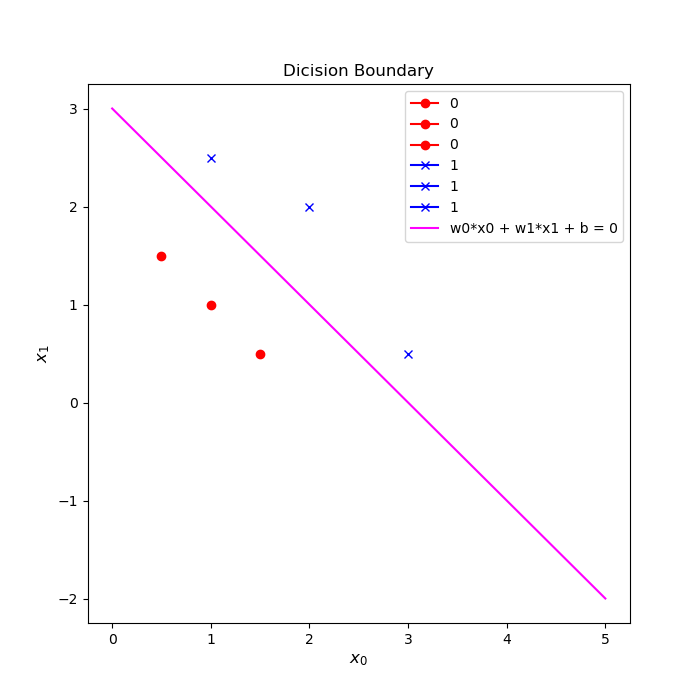

In [10]:
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)) # should print: 0.36686678640551745

# Plot the data
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
x0 = np.arange(0, 6)
x1 = 3 - x0
for i in range(X_train.shape[0]):
    ax.plot(X_train[i][0], X_train[i][1], marker = 'o' if y_train[i] == 0 else 'x', color = 'r' if y_train[i] == 0 else 'b', label = '0' if y_train[i] == 0 else '1')

ax.plot(x0, x1, label = 'w0*x0 + w1*x1 + b = 0', color="magenta")
ax.set_xlabel("$x_0$", fontsize = 12)
ax.set_ylabel("$x_1$", fontsize = 12)
plt.title("Dicision Boundary")
plt.legend(loc='upper right')
plt.show()

### Testing `compute_gradient_logistic` function

In [12]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

# output should be the following: 
# dj_db: 0.49861806546328574
# dj_dw: [0.498333393278696, 0.4988394298399669]

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.4988394298399669]


### Testing `gradient_descent` function

In [13]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

# output should be the following: updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837

Iteration 0	cost = 0.684610468560574
Iteration 5	cost = 0.6605264712079517
Iteration 10	cost = 0.6485727103227239
Iteration 15	cost = 0.6397376309178786
Iteration 20	cost = 0.6318411432998224
Iteration 25	cost = 0.6243260447812662
Iteration 30	cost = 0.6170382193635989
Iteration 35	cost = 0.6099281073906585
Iteration 40	cost = 0.6029747998642602
Iteration 45	cost = 0.596166125108989
Iteration 50	cost = 0.589493208966662
Iteration 55	cost = 0.5829488591699208
Iteration 60	cost = 0.5765269908844487
Iteration 65	cost = 0.570222354994094
Iteration 70	cost = 0.5640303688325167
Iteration 75	cost = 0.5579469921774135
Iteration 80	cost = 0.5519686299902001
Iteration 85	cost = 0.5460920542465432
Iteration 90	cost = 0.5403143405845309
Iteration 95	cost = 0.5346328168077569
Iteration 100	cost = 0.5290450209691863
Iteration 105	cost = 0.5235486672238564
Iteration 110	cost = 0.5181416179890278
Iteration 115	cost = 0.5128218612286368
Iteration 120	cost = 0.5075874919029192
Iteration 125	cost = 0.502